# Lotka-Volterra Parameter Estimation Benchmarks
https://benchmarks.juliadiffeq.org/html/ParameterEstimation/LotkaVolterraParameterEstimation.html

## Parameter estimation of Lotka Volterra model using optimisation methods

In [1]:
using ParameterizedFunctions, OrdinaryDiffEq, DiffEqParamEstim
using BlackBoxOptim, NLopt, Plots, RecursiveArrayTools
# gr(fmt=:png)
pyplot(fmt=:png)

Plots.PyPlotBackend()

In [2]:
loc_bounds = Tuple{Float64, Float64}[(0, 5), (0, 5), (0, 5), (0, 5)]
glo_bounds = Tuple{Float64, Float64}[(0, 10), (0, 10), (0, 10), (0, 10)]
loc_init = [1,0.5,3.5,1.5]
glo_init = [5,5,5,5]

4-element Array{Int64,1}:
 5
 5
 5
 5

In [3]:
f = @ode_def LotkaVolterraTest begin
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
end a b c d

(::LotkaVolterraTest{var"#7#11",var"#8#12",var"#9#13",Nothing,Nothing,var"#10#14",Expr,Expr}) (generic function with 2 methods)

In [4]:
u0 = [1.0,1.0]                          #initial values
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1,0]                   #parameters used, these need to be estimated from the data
tspan = (0.0, 30.0)                     # sample of 3000 observations over the (0,30) timespan
prob = ODEProblem(f, u0, tspan,p)
tspan2 = (0.0, 3.0)                     # sample of 3000 observations over the (0,30) timespan
prob_short = ODEProblem(f, u0, tspan2,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 3.0)
u0: [1.0, 1.0]

In [5]:
dt = 30.0/3000
tf = 30.0
tinterval = 0:dt:tf
t  = collect(tinterval)

3001-element Array{Float64,1}:
  0.0 
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1 
  0.11
  0.12
  ⋮   
 29.89
 29.9 
 29.91
 29.92
 29.93
 29.94
 29.95
 29.96
 29.97
 29.98
 29.99
 30.0 

In [6]:
h = 0.01
M = 300
tstart = 0.0
tstop = tstart + M * h
tinterval_short = 0:h:tstop
t_short = collect(tinterval_short)

301-element Array{Float64,1}:
 0.0 
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1 
 0.11
 0.12
 ⋮   
 2.89
 2.9 
 2.91
 2.92
 2.93
 2.94
 2.95
 2.96
 2.97
 2.98
 2.99
 3.0 

In [7]:
#Generate Data
data_sol_short = solve(prob_short,Tsit5(),saveat=t_short,
    reltol=1e-9,abstol=1e-9)
data_short = convert(Array, data_sol_short)
data_sol = solve(prob,Tsit5(),saveat=t,reltol=1e-9,abstol=1e-9)
data = convert(Array, data_sol)

2×3001 Array{Float64,2}:
 1.0  1.00511   1.01045   1.01601   1.02179   …  1.07814   1.08595   1.09398 
 1.0  0.980224  0.960888  0.941986  0.923508     0.785597  0.770673  0.756092

## Plot of the solution
### Short solution

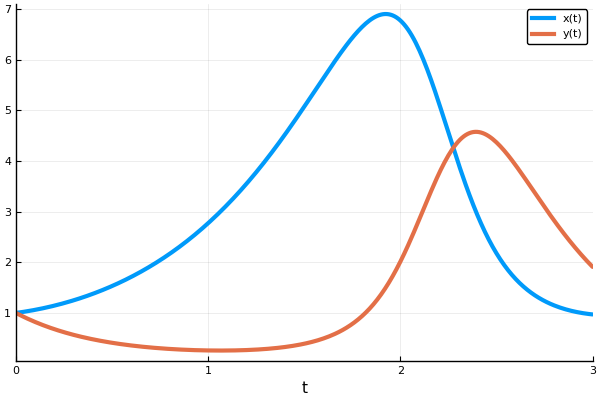

In [8]:
p1 = plot(data_sol_short)

### Longer solution

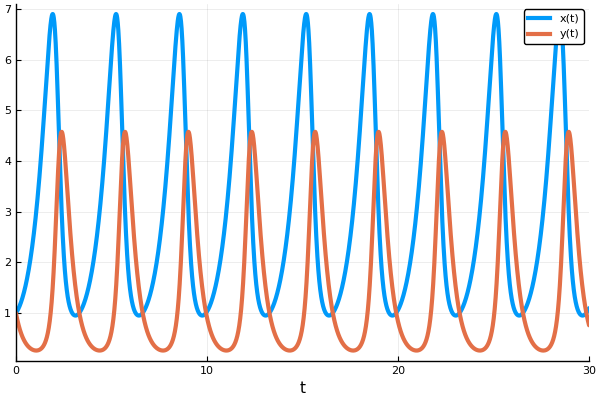

In [9]:
p2 = plot(data_sol)

## Local Solution from the short data set

In [10]:
obj_short = build_loss_objective(prob_short,Tsit5(),
    L2Loss(t_short,data_short),tstops=t_short)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 2211 evals, 2079 steps, improv/step: 0.187 (last = 0.1866), fitness=360.038767395
1.00 secs, 5098 evals, 4967 steps, improv/step: 0.179 (last = 0.1738), fitness=0.143648654

Optimization stopped after 7001 steps and 1.34 seconds
Termination reason: Max number of steps (7000) reached
Steps per second = 5215.70
Function evals per second = 5313.30
Improvements/step = 0.17600
Total function evaluations = 7132


Best candidate found: [1.49906, 0.998988, 3.00403, 1.00157]

Fitness: 0.002469181



BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.581107946291639e9, 1.3422930240631104, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 728266,:SearchRange => Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0.0, 10.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7132, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(0.002469180789917219, [1.4990587962494821, 0.998987825579432, 3.0040349267943163, 1.0015652444252021]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([1.4974333203869399 1.4999688491142538

In [11]:
# Lower tolerance could lead to smaller fitness (more accuracy)
obj_short = build_loss_objective(prob_short,Tsit5(),
    L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 2859 evals, 2747 steps, improv/step: 0.177 (last = 0.1769), fitness=24.830191288
1.00 secs, 5806 evals, 5695 steps, improv/step: 0.175 (last = 0.1727), fitness=0.036883387

Optimization stopped after 7001 steps and 1.22 seconds
Termination reason: Max number of steps (7000) reached
Steps per second = 5736.85
Function evals per second = 5826.99
Improvements/step = 0.17957
Total function evaluations = 7111


Best candidate found: [1.49926, 0.999219, 3.00089, 1.00059]

Fitness: 0.001326368



BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.581108009213364e9, 1.2203562259674072, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 544243,:SearchRange => Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0.0, 10.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7111, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(0.0013263680070317162, [1.4992579365902738, 0.9992188667402573, 3.000890094618177, 1.0005916508062738]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([1.5032213442963274 1.501173634791905

In [12]:
# Change in tolerance makes it worse
obj_short = build_loss_objective(prob_short,Vern9(),
    L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9,abstol=1e-9)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 1886 evals, 1734 steps, improv/step: 0.180 (last = 0.1799), fitness=322.844016864
1.00 secs, 3840 evals, 3688 steps, improv/step: 0.169 (last = 0.1592), fitness=6.898051322
1.50 secs, 5860 evals, 5708 steps, improv/step: 0.166 (last = 0.1609), fitness=0.096042652

Optimization stopped after 7001 steps and 1.81 seconds
Termination reason: Max number of steps (7000) reached
Steps per second = 3861.26
Function evals per second = 3944.54
Improvements/step = 0.16486
Total function evaluations = 7152


Best candidate found: [1.49914, 0.998916, 3.00607, 1.00142]

Fitness: 0.006304656



BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.581108052003552e9, 1.8131389617919922, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 238329,:SearchRange => Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0.0, 10.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7152, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(0.0063046560004597725, [1.4991446516388822, 0.9989155244519075, 3.006072461825817, 1.0014182171755763]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([1.4957381174718152 1.493808989754174

## Using NLopt
### Global Optimisation first

In [13]:
obj_short = build_loss_objective(prob_short,Vern9(),
    L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9,abstol=1e-9)


(::DiffEqObjective{DiffEqParamEstim.var"#43#48"{Nothing,Bool,Int64,typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR),Base.Iterators.Pairs{Symbol,Any,Tuple{Symbol,Symbol,Symbol},NamedTuple{(:tstops, :reltol, :abstol),Tuple{Array{Float64,1},Float64,Float64}}},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},true,Array{Float64,1},LotkaVolterraTest{var"#7#11",var"#8#12",var"#9#13",Nothing,Nothing,var"#10#14",Expr,Expr},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{,Tuple{}}},DiffEqBase.StandardODEProblem},Vern9,L2Loss{Array{Float64,1},Array{Float64,2},Nothing,Nothing,Nothing},Nothing},DiffEqParamEstim.var"#47#53"{DiffEqParamEstim.var"#43#48"{Nothing,Bool,Int64,typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR),Base.Iterators.Pairs{Symbol,Any,Tuple{Symbol,Symbol,Symbol},NamedTuple{(:tstops, :reltol, :abstol),Tuple{Array{Float64,1},Float64,Float64}}},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},true,Array{Float64,1},LotkaVolterraTest{var"#7#11",var"#8#12",var"#9#13",Nothing,No

In [14]:
opt = Opt(:GN_ORIG_DIRECT_L, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

  0.947067 seconds (1.60 M allocations: 378.689 MiB, 5.65% gc time)


(368.38768828453067, [1.7283950617224937, 2.22222222222419, 3.580246913586148, 1.1172077427280471], :XTOL_REACHED)

In [15]:
opt = Opt(:GN_CRS2_LM, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:333
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:333
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:333
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:333
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @

  1.834034 seconds (3.03 M allocations: 719.801 MiB, 4.78% gc time)


(1.666099217372899e-16, [1.5000000000697395, 1.0000000000846163, 2.9999999995098863, 0.9999999999261484], :XTOL_REACHED)

In [16]:
opt = Opt(:GN_ISRES, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

  2.329903 seconds (3.98 M allocations: 964.432 MiB, 4.15% gc time)


(30.260973691979732, [1.4928153196422589, 1.1451947996343592, 3.322986519969529, 1.0577924439438486], :MAXEVAL_REACHED)

In [17]:
opt = Opt(:GN_ESCH, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)


  2.322283 seconds (3.98 M allocations: 964.432 MiB, 4.64% gc time)


(106.94833228990282, [1.2256032528934453, 1.0003155226678273, 5.197714574490526, 1.7538044975162155], :MAXEVAL_REACHED)

Now local optimization algorithms are used to check the global ones, these use the local constraints, different intial values and time step



In [18]:
opt = Opt(:LN_BOBYQA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.094933 seconds (145.40 k allocations: 34.194 MiB)


(1.6660922429170482e-16, [1.5000000000702367, 1.0000000000848144, 2.99999999950844, 0.9999999999254128], :XTOL_REACHED)

In [19]:
opt = Opt(:LN_NELDERMEAD, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.114419 seconds (199.41 k allocations: 48.319 MiB)


(1.6660944512259585e-16, [1.5000000000705116, 1.0000000000852818, 2.999999999507228, 0.9999999999250377], :XTOL_REACHED)

In [20]:
opt = Opt(:LD_SLSQP, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.122969 seconds (213.09 k allocations: 31.696 MiB, 15.91% gc time)


(4.192517461011093e-16, [1.4999999996827051, 1.000000000171298, 3.000000002088608, 1.0000000007284293], :XTOL_REACHED)

In [21]:
opt = Opt(:LN_COBYLA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  2.301789 seconds (3.98 M allocations: 964.432 MiB, 4.31% gc time)


(2.095834367163097e-10, [1.4999994892072248, 0.999999852720916, 3.000002650119225, 1.0000008332818766], :MAXEVAL_REACHED)

In [22]:
opt = Opt(:LN_NEWUOA_BOUND, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.310953 seconds (90.76 k allocations: 21.990 MiB)


(1.974260823257644e-9, [1.5000002678499593, 1.0000012766604875, 3.0000011082750206, 1.0000001048380573], :SUCCESS)

In [23]:
opt = Opt(:LN_PRAXIS, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)


  0.063451 seconds (85.58 k allocations: 20.736 MiB)


(1.6936005316510485e-16, [1.5000000000744644, 1.0000000001306948, 2.999999999594481, 0.999999999944931], :SUCCESS)

In [24]:
opt = Opt(:LN_SBPLX, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  2.312187 seconds (3.98 M allocations: 964.432 MiB, 4.22% gc time)


(3.857624483455275e-12, [1.4999999301104459, 0.9999999814386067, 3.000000353466034, 1.0000001103210938], :MAXEVAL_REACHED)

In [25]:
opt = Opt(:LD_MMA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  4.688225 seconds (7.86 M allocations: 1.874 GiB, 4.34% gc time)


(6.678300918709951e-15, [1.4999999973062776, 0.9999999994973329, 3.0000000143108423, 1.0000000046124624], :XTOL_REACHED)

In [26]:
opt = Opt(:LD_TNEWTON_PRECOND_RESTART, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.097202 seconds (142.09 k allocations: 34.685 MiB)


(4.192393249865537e-16, [1.4999999996827114, 1.0000000001712928, 3.000000002088565, 1.0000000007284133], :SUCCESS)

## Now the longer problem is solved for a global solution
Vern9 solver with reltol=1e-9 and abstol=1e-9 is used and the dataset is increased to 3000 observations per variable with the same integration time step of 0.01.

In [27]:
obj = build_loss_objective(prob,Vern9(),L2Loss(t,data),
    tstops=t,reltol=1e-9,abstol=1e-9)
res1 = bboptimize(obj;SearchRange = glo_bounds, MaxSteps = 4e3)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 219 evals, 148 steps, improv/step: 0.527 (last = 0.5270), fitness=24635.969861628
1.00 secs, 459 evals, 372 steps, improv/step: 0.339 (last = 0.2143), fitness=23072.188322578
1.51 secs, 688 evals, 595 steps, improv/step: 0.303 (last = 0.2422), fitness=23072.188322578
2.01 secs, 922 evals, 829 steps, improv/step: 0.248 (last = 0.1111), fitness=23072.188322578
2.51 secs, 1146 evals, 1053 steps, improv/step: 0.235 (last = 0.1830), fitness=23072.188322578
3.01 secs, 1378 evals, 1285 steps, improv/step: 0.212 (last = 0.1121), fitness=23072.188322578
3.51 secs, 1613 evals, 1520 steps, improv/step: 0.200 (last = 0.1319), fitness=23072.188322578
4.01 secs, 1843 evals, 1750 steps, improv/step: 0.185 (last = 0.0870), fitness=21968.631505533
4.51 secs, 2083 evals, 1991 steps, improv/step:

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (4000) reached", 4001, 1.581108607245036e9, 8.87353801727295, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 276522,:SearchRange => Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0.0, 10.0)],:MaxSteps => 4000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 4090, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(5215.684634236345, [4.327559418847416, 4.314746537440885, 0.9075910457369962, 0.2776965005336708]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([7.383302295714708 8.450066015365778 … 7.072

In [28]:
opt = Opt(:GN_ORIG_DIRECT_L, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

  4.463815 seconds (6.51 M allocations: 1.578 GiB, 3.31% gc time)


(23525.885834891702, [8.271604938277504, 7.421124828514532, 7.402834933693231, 3.7037037037056706], :XTOL_REACHED)

In [29]:
opt = Opt(:GN_CRS2_LM, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 20000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)


┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:333


 42.308337 seconds (62.16 M allocations: 15.075 GiB, 3.06% gc time)


(23364.367168817444, [9.999999999999822, 9.111019864495368, 6.0946296461226215, 2.950814594390695], :MAXEVAL_REACHED)

In [30]:
opt = Opt(:GN_ISRES, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 50000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

107.029660 seconds (155.40 M allocations: 37.689 GiB, 3.14% gc time)


(22220.35780101357, [2.09942966895605, 5.447657737304893, 2.6120866708130075, 0.9315662121044144], :MAXEVAL_REACHED)

In [31]:
opt = Opt(:GN_ESCH, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 20000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

 42.485574 seconds (62.16 M allocations: 15.076 GiB, 3.05% gc time)


(9904.458423146938, [0.6839782726024053, 0.5435829812350074, 7.694706346996951, 3.920775726310541], :MAXEVAL_REACHED)

In [32]:
opt = Opt(:LN_BOBYQA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  1.272690 seconds (1.84 M allocations: 456.178 MiB, 3.28% gc time)


(1.2706863918599434e-14, [1.4999999994887927, 1.000000000235084, 3.00000000176495, 1.0000000007536436], :SUCCESS)

In [33]:
opt = Opt(:LN_NELDERMEAD, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-9)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  1.024875 seconds (1.48 M allocations: 367.412 MiB, 3.24% gc time)


(1.7650193766385424e-14, [1.499999999818285, 1.0000000007450542, 3.000000000845967, 1.000000000383562], :XTOL_REACHED)

In [34]:
opt = Opt(:LD_SLSQP, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:319
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:333
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:319
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:319
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ DiffEqBase /home/seneryilmaz/.julia/packages/DiffEqBase/cwiDm/src/integrator_interface.jl:319


  3.068603 seconds (1.98 M allocations: 493.023 MiB, 1.40% gc time)


(21569.713608932856, [3.259711731509334, 2.7238409757250213, 0.8581704877145914, 0.40449683990312385], :XTOL_REACHED)

### Parameter estimation on the longer sample proves to be extremely challenging for some of the global optimizers. A few give the accurate values, BlacBoxOptim also performs quite well while others seem to struggle with accuracy a lot.
## Conclusion
In general we observe that lower tolerance lead to higher accuracy but too low tolerance could affect the convergance time drastically. Also fitting a shorter timespan seems to be easier in comparision (quite intutively). NLOpt methods seem to give great accuracy in the shorter problem with a lot of the algorithms giving 0 fitness, BBO performs very well on it with marginal change with tol values. In case of global optimization of the longer problem there is some difference in the perfomance amongst the algorithms with ```LD_SLSQP``` ```GN_ESCH``` ````GN_ISRES```` ````GN_ORIG_DIRECT_L```` performing among the worse, BBO also gives a bit high fitness in comparison. QuadDIRECT gives accurate results in the case of the shorter problem but doesn't perform very well in the longer problem case.